In [9]:
company = 'BABA'
freq = 'daily'
path = company + "_" + freq + ".csv"

In [ ]:
!python3 save_data_to_csv.py $company $freq

In [10]:
!python3 tech_ind_model.py $company $freq

2021-01-28 10:55:33.434767: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-28 10:55:33.434841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
(1396, 50, 5)
(156, 50, 5)
2021-01-28 10:55:35.938984: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-28 10:55:35.939269: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-28 10:55:35.939310: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-28 10:55:35.939456: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver doe

40/40 [==============================] - 1s 31ms/step - loss: 5.5596e-04 - val_loss: 1.1669e-04
Epoch 61/200
40/40 [==============================] - 1s 32ms/step - loss: 5.9089e-04 - val_loss: 1.8100e-04
Epoch 62/200
40/40 [==============================] - 1s 36ms/step - loss: 5.9606e-04 - val_loss: 1.1943e-04
Epoch 63/200
40/40 [==============================] - 1s 33ms/step - loss: 5.1172e-04 - val_loss: 1.1261e-04
Epoch 64/200
40/40 [==============================] - 1s 31ms/step - loss: 6.2534e-04 - val_loss: 2.0948e-04
Epoch 65/200
40/40 [==============================] - 1s 32ms/step - loss: 6.0213e-04 - val_loss: 1.3770e-04
Epoch 66/200
40/40 [==============================] - 1s 31ms/step - loss: 5.3970e-04 - val_loss: 1.1247e-04
Epoch 67/200
40/40 [==============================] - 1s 32ms/step - loss: 4.7392e-04 - val_loss: 1.3725e-04
Epoch 68/200
40/40 [==============================] - 1s 31ms/step - loss: 5.2735e-04 - val_loss: 1.1863e-04
Epoch 69/200
40/40 [============

40/40 [==============================] - 1s 32ms/step - loss: 3.7768e-04 - val_loss: 1.5125e-04
Epoch 136/200
40/40 [==============================] - 1s 31ms/step - loss: 4.4582e-04 - val_loss: 6.6222e-05
Epoch 137/200
40/40 [==============================] - 1s 31ms/step - loss: 4.5173e-04 - val_loss: 7.9882e-05
Epoch 138/200
40/40 [==============================] - 1s 29ms/step - loss: 4.5599e-04 - val_loss: 1.4070e-04
Epoch 139/200
40/40 [==============================] - 1s 31ms/step - loss: 4.6541e-04 - val_loss: 1.1783e-04
Epoch 140/200
40/40 [==============================] - 1s 32ms/step - loss: 4.5647e-04 - val_loss: 1.2691e-04
Epoch 141/200
40/40 [==============================] - 2s 40ms/step - loss: 3.6560e-04 - val_loss: 1.3946e-04
Epoch 142/200
40/40 [==============================] - 1s 32ms/step - loss: 3.8769e-04 - val_loss: 7.3790e-05
Epoch 143/200
40/40 [==============================] - 2s 38ms/step - loss: 3.6588e-04 - val_loss: 3.8566e-04
Epoch 144/200
40/40 [===

In [11]:
import numpy as np
from keras.models import load_model
from util import csv_to_dataset, history_points

model = load_model('technical_model' + company + "_" + freq + '.h5')

ohlcv_histories, technical_indicators, next_day_open_values, unscaled_y, y_normaliser = csv_to_dataset(path)

test_split = 0.9
n = int(ohlcv_histories.shape[0] * test_split)

ohlcv_train = ohlcv_histories[:n]
tech_ind_train = technical_indicators[:n]
y_train = next_day_open_values[:n]

ohlcv_test = ohlcv_histories[n:]
tech_ind_test = technical_indicators[n:]
y_test = next_day_open_values[n:]

unscaled_y_test = unscaled_y[n:]

y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

buys = []
sells = []
thresh = 0.1

start = 0
end = -1

x = -1

<AxesSubplot:xlabel='Date'>

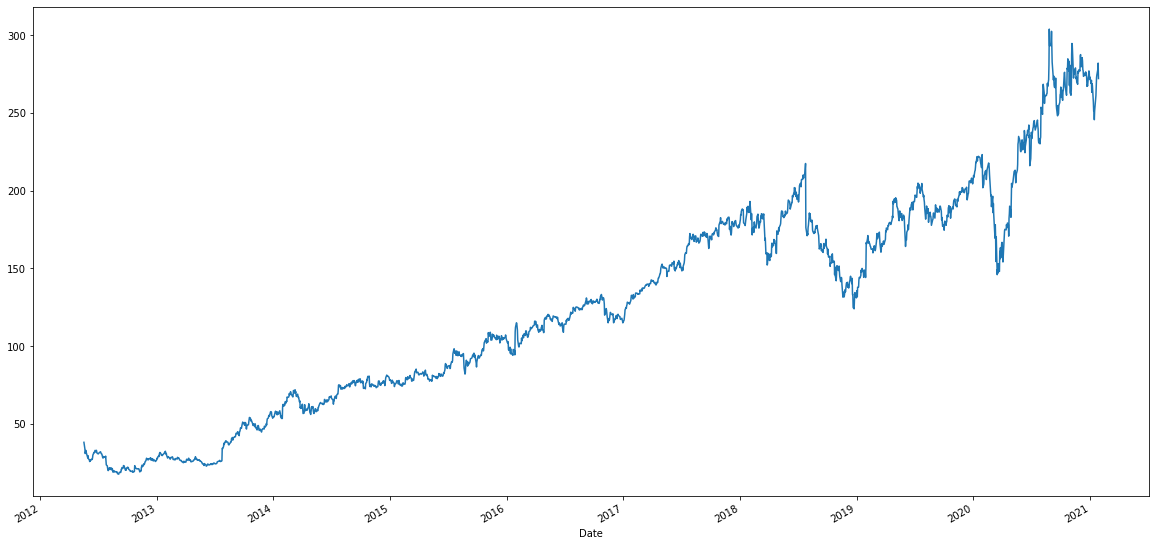

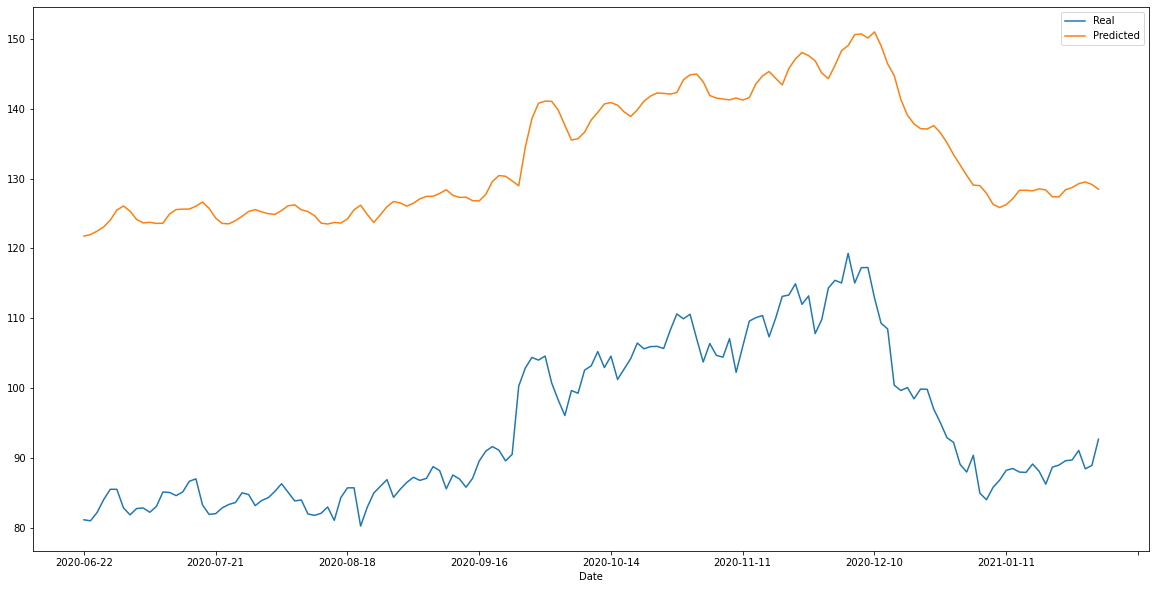

In [12]:
import pandas as pd
from yfinance import yfinance as yf
msft = yf.Ticker("FB")
# get stock info
msft.info
# get historical market data
hist = msft.history(period="max")
hist['Close'].plot(y="Close", use_index=True, figsize=(20,10))




data = pd.read_csv(path)['date'].tolist()
dates = data[0:len(unscaled_y_test[start:end])]
dates.reverse()
dataframe = {'Date': dates,
        'Real': [x[0] for x in unscaled_y_test[start:end].tolist()],
        'Predicted': [x[0] for x in y_test_predicted[start:end].tolist()]}
df = pd.DataFrame(dataframe, columns=['Date', 'Real', 'Predicted'])
df.plot(x ='Date', y=['Real', 'Predicted'], kind = 'line', figsize=(20,10))

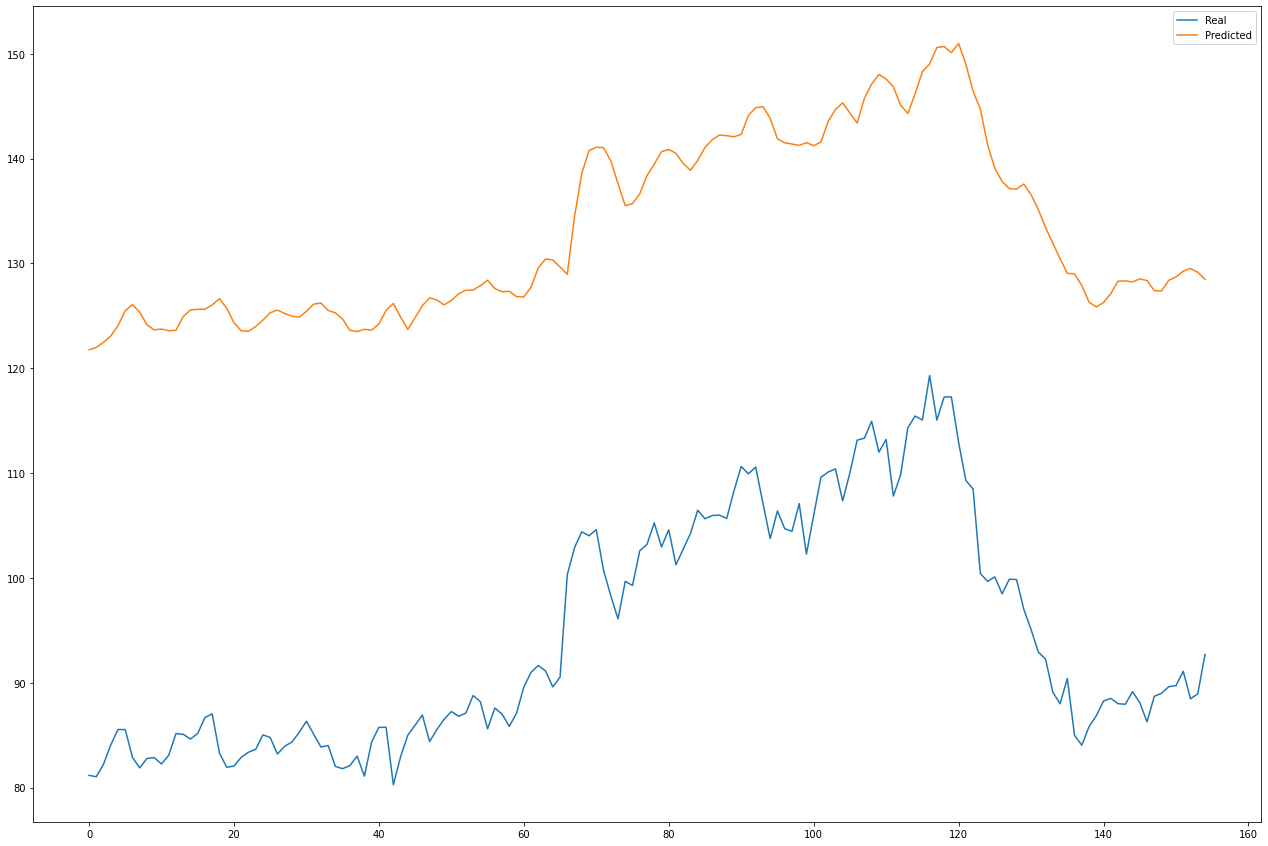

In [13]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(22, 15, forward=True)

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

In [14]:
df

,Date,Real,Predicted
0,2020-06-22,81.17,121.765358
1,2020-06-23,81.03,121.984917
2,2020-06-24,82.22,122.476036
3,2020-06-25,84.06,123.075607
4,2020-06-26,85.54,124.047256
...,...,...,...
150,2021-01-26,89.73,128.707230
151,2021-01-27,91.09,129.262802
152,2021-01-28,88.47,129.517258
153,2021-01-29,88.94,129.152161
